In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets 
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
np.random.seed(0)

In [4]:
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.svm import SVC, SVR

In [5]:
HData = pd.read_csv('/content/sample_data/Housing (1).csv')
print(HData)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [6]:
HData.mainroad.replace(('yes', 'no'), (1, 0), inplace=True)
HData.guestroom.replace(('yes', 'no'), (1, 0), inplace=True)
HData.basement.replace(('yes', 'no'), (1, 0), inplace=True)
HData.hotwaterheating.replace(('yes', 'no'), (1, 0), inplace=True)
HData.airconditioning.replace(('yes', 'no'), (1, 0), inplace=True)
HData.prefarea.replace(('yes', 'no'), (1, 0), inplace=True)
HData.furnishingstatus.replace(('furnished', 'semi-furnished', 'unfurnished'), (2, 1, 0), inplace=True)

In [7]:
HData_train, HData_test = train_test_split(HData, train_size =  0.8, test_size = 0.2)
HData_train = pd.DataFrame(StandardScaler().fit_transform(HData_train), columns= HData_train.columns, index= HData_train.index)
HData_test = pd.DataFrame(StandardScaler().fit_transform(HData_test), columns= HData_test.columns, index= HData_test.index)

In [8]:
area = HData_train.values[:,1]
bdr = HData_train.values[:,2]
bth = HData_train.values[:,3]
st = HData_train.values[:,4]
main = HData_train.values[:,5]
gst = HData_train.values[:,6]
bmt = HData_train.values[:,7]
hotw = HData_train.values[:,8]
ac = HData_train.values[:,9]
p = HData_train.values[:,10]
pref = HData_train.values[:,11]
Y = HData_train.values[:,0]

In [9]:
area_V = HData_test.values[:,1]
bdr_V = HData_test.values[:,2]
bth_V = HData_test.values[:,3]
st_V = HData_test.values[:,4]
main_V = HData_test.values[:,5]
gst_V = HData_test.values[:,6]
bmt_V = HData_test.values[:,7]
hotw_V = HData_test.values[:,8]
ac_V = HData_test.values[:,9]
p_V = HData_test.values[:,10]
pref_V = HData_test.values[:,11]
Y_V = HData_test.values[:,0]

In [10]:
m = len(Y)
m_V = len(Y_V)


In [11]:
X_0 = np.ones((m,1))
X_0V = np.ones((m_V,1))

In [12]:
area = area.reshape(m,1)
bdr = bdr.reshape(m,1)
bth = bth.reshape(m,1)
st = st.reshape(m,1)
main = main.reshape(m,1)
gst = gst.reshape(m,1)
bmt = bmt.reshape(m,1)
hotw = hotw.reshape(m,1)
ac = ac.reshape(m,1)
p = p.reshape(m,1)
pref = pref.reshape(m,1)

In [13]:
area_V = area_V.reshape(m_V,1)
bdr_V = bdr_V.reshape(m_V,1)
bth_V = bth_V.reshape(m_V,1)
st_V = st_V.reshape(m_V,1)
main_V = main_V.reshape(m_V,1)
gst_V = gst_V.reshape(m_V,1)
bmt_V = bmt_V.reshape(m_V,1)
hotw_V = hotw_V.reshape(m_V,1)
ac_V = ac_V.reshape(m_V,1)
p_V = p_V.reshape(m_V,1)
pref_V = pref_V.reshape(m_V,1)

In [14]:
X = np.hstack((X_0, area, bdr, bth, st, main, gst, bmt, hotw, ac, p, pref))
X_V = np.hstack((X_0V, area_V, bdr_V, bth_V, st_V, main_V, gst_V, bmt_V, hotw_V, ac_V, p_V, pref_V))

In [15]:
# Perform SVR Regression with linear kernel.

K = np.array(range(12))
K_max = 12
accuracy = np.zeros(12)
mse = np.zeros(12)

In [27]:
for k in K: 
    
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

    # Linear Support vector regression model
    model = SVR(kernel = 'linear', C = 1E3)
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    accuracy[k] = model.score(X_test, Y_test)
    mse[k] = mean_squared_error(Y_test, Y_pred)

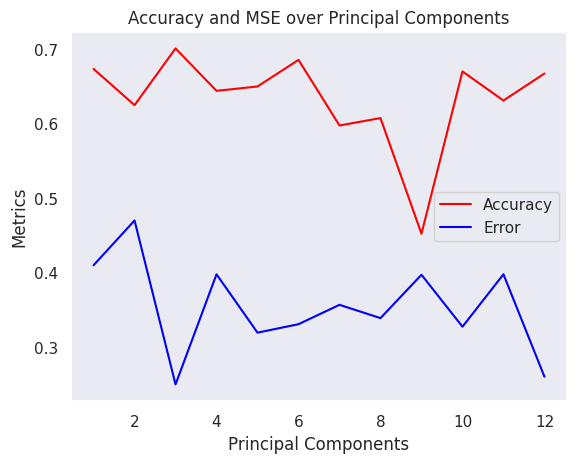

In [28]:
plt.figure()
plt.plot(range(1, K_max+1), accuracy, color = 'red', label = "Accuracy")
plt.plot(range(1, K_max+1), mse, color = 'blue', label = "Error")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy and MSE over Principal Components')
plt.legend()

In [29]:
# Perform SVR Regression with rbf kernel.
K = np.array(range(12))
K_max = 12
accuracy = np.zeros(12)
mse = np.zeros(12)


In [30]:
for k in K:

    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)
    
    # Linear Support vector regression model
    classifier = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)
    
    accuracy[k] = model.score(X_test, Y_test)
    mse[k] = mean_squared_error(Y_test, Y_pred)

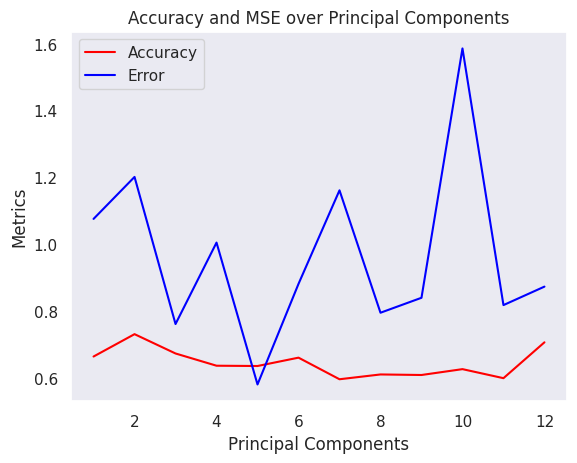

In [31]:
plt.figure()
plt.plot(range(1, K_max+1), accuracy, color = 'red', label = "Accuracy")
plt.plot(range(1, K_max+1), mse, color = 'blue', label = "Error")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy and MSE over Principal Components')
plt.legend()


In [32]:
# Perform SVR Classification with poly kernel.

K = np.array(range(12))
K_max = 12
accuracy = np.zeros(12)
mse = np.zeros(12)

In [33]:
for k in K:

    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)
    
    # Linear Support vector regression model
    classifier = SVR(kernel = 'poly', C = 1e3, degree = 2)
    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)
    
    accuracy[k] = model.score(X_test, Y_test)
    mse[k] = mean_squared_error(Y_test, Y_pred)

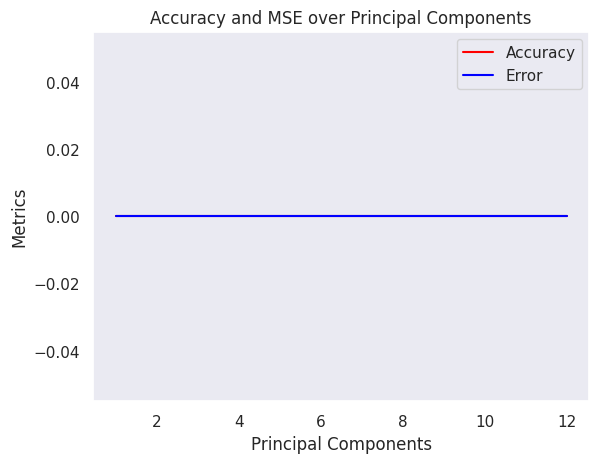

In [22]:
plt.figure()
plt.plot(range(1, K_max+1), accuracy, color = 'red', label = "Accuracy")
plt.plot(range(1, K_max+1), mse, color = 'blue', label = "Error")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy and MSE over Principal Components')
plt.legend()